In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import sys
import os
sys.path.append(os.path.abspath("../.."))  # Adds the project root to sys.path
import numpy as np 
import math
import tensorflow as tf

from recommenders.datasets.linear_regression import *

In [2]:
save_interaction_values()

In [11]:
Y, R, num_products = get_data()

Y (117, 4) R (117, 4)
num_products 117
num_users 4


In [12]:
my_ratings = np.zeros(num_products)

my_ratings[2] = 0.1
my_ratings[50] = 1.7
my_ratings[51] = 1.7

# Add new user ratings to Y 
Y = np.c_[my_ratings, Y]

# Add new user indicator matrix to R
R = np.c_[(my_ratings != 0).astype(int), R]


In [4]:
# test_recency_bonus(100, 20)

In [13]:
num_users = Y.shape[1] # FT: It's mandatory because we could add one more user to the matrix

X, W, b = initialize_tf_variables(num_users, num_products)

Training loss at iteration 0: 11370.467652900741
Training loss at iteration 20: 1373.0556621901724
Training loss at iteration 40: 315.9292458937031
Training loss at iteration 60: 97.07633992890567
Training loss at iteration 80: 37.533279883462285
Training loss at iteration 100: 17.927565000481913
Training loss at iteration 120: 9.816008861408855
Training loss at iteration 140: 5.868344442812938
Training loss at iteration 160: 3.767669228230383
Training loss at iteration 180: 2.592075387805489
Training loss at iteration 200: 1.9166266404227708
Training loss at iteration 220: 1.522980694505185
Training loss at iteration 240: 1.2906931958341148
Training loss at iteration 260: 1.1517898623504794
Training loss at iteration 280: 1.0676174742280737
Training loss at iteration 300: 1.015958164606666
Training loss at iteration 320: 0.9838591625214693
Training loss at iteration 340: 0.9636661763507541
Training loss at iteration 360: 0.9508034310471078
Training loss at iteration 380: 0.94250763570

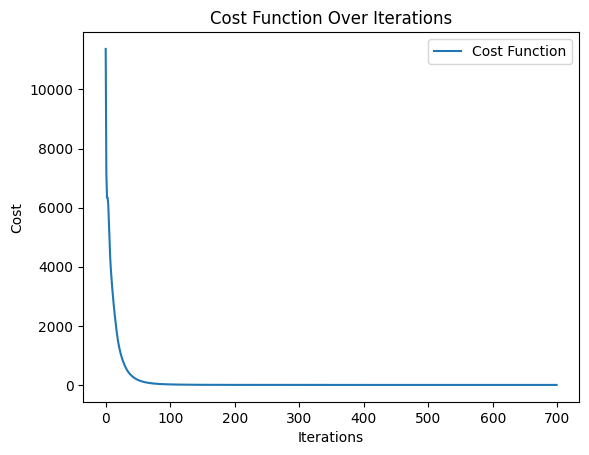

In [14]:
Ynorm, Ymean = normalize_ratings(Y, R) # FT: Even if it's implicit feedback recommender, some users generate significantly more interactions than others.
calculate_parameters(X, W, b, Ynorm, R, iterations=700, lambda_=1, learning_rate=0.1)

In [16]:
product_names = load_csv_list('Products.csv')

# Make a prediction using trained weights and biases
predictions_normalized = np.matmul(X.numpy(), np.transpose(W.numpy())) + b.numpy()

#restore the mean
predictions = predictions_normalized + Ymean

rmse(Y, predictions, R)

my_predictions = predictions[:,0]
sorted_indices = np.argsort(my_predictions)[::-1]

for idx in sorted_indices[:10]:
    print(f'{product_names[idx]} -> {my_predictions[idx]}')

# for i in range(len(my_predictions)):
#     # print(f'Predict: {my_predictions[i]:0.5f}, Original: {Y[i,0]:0.5f}')
#     if my_ratings[i] > 0:
#         print(f'Original {my_ratings[i]}, Predicted {my_predictions[i]:0.2f} for {product_names[i]}')



RMSE score: 0.1056839149894217
['EN 2351315'] -> 1.4639502296536595
['EN 2351666'] -> 1.4625712347737543
['VILL 067113'] -> 1.419653050707199
['Vill 074376'] -> 1.4194561084913933
['VILL 060114'] -> 1.3282978125908482
['1600Z00038'] -> 1.1953815085618933
['2608690127'] -> 1.1940344378988117
['2608644374'] -> 1.194034322700356
['601094300'] -> 1.1575269546834903
['601396102'] -> 1.1575269036488725
